In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical



In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [37]:
test_data = pd.read_csv('test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

In [38]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


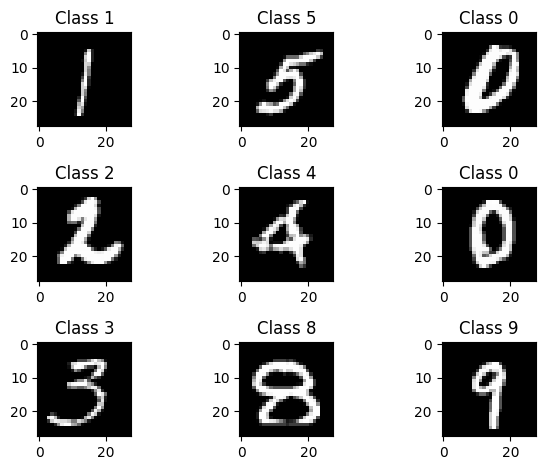

In [39]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [40]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# Berikut adalah penjelasan tentang kode yang Anda berikan:

# 1. Mengubah Bentuk Array (Reshape):

#     python

# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)

#     Kode ini mengubah bentuk (reshape) dari array X_train dan X_test.
#     X_train yang awalnya mungkin memiliki bentuk 3D (misalnya, 60000 gambar berukuran 28x28 pixel untuk dataset MNIST) diubah menjadi bentuk 2D dengan 60000 baris dan 784 kolom.
#     Kolom (784) diperoleh dari hasil 28x28 (jumlah total pixel dalam setiap gambar).
#     Begitu juga dengan X_test, yang memiliki 10000 gambar yang juga diubah menjadi bentuk 2D dengan 10000 baris dan 784 kolom.

# 2. Mengubah Tipe Data:

# python

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

#     Kode ini mengubah tipe data dari array X_train dan X_test menjadi float32.
#     Hal ini penting untuk memastikan bahwa data numerik dapat diproses dengan lebih efisien oleh model machine learning.

# 3. Normalisasi Data:

# python

# X_train /= 255
# X_test /= 255

#     Kode ini melakukan normalisasi pada nilai pixel dalam array X_train dan X_test.
#     Dengan membagi setiap nilai pixel dengan 255 (nilai maksimum pixel dalam citra grayscale), semua nilai pixel akan berada dalam rentang [0, 1].
#     Normalisasi ini membantu model belajar lebih efektif karena mengurangi skala variabilitas input.

# 4. Menampilkan Bentuk Matriks:

# python

#     print("Training matrix shape", X_train.shape)
#     print("Testing matrix shape", X_test.shape)

#         Kode ini mencetak bentuk dari matriks X_train dan X_test ke layar.
#         Ini memungkinkan Anda untuk memverifikasi bahwa reshape dan normalisasi telah dilakukan dengan benar.

# Secara keseluruhan, kode ini melakukan persiapan data untuk model machine learning, khususnya dalam konteks pengenalan citra, seperti pada dataset MNIST. Dengan melakukan reshape, mengubah tipe data, dan normalisasi, data menjadi siap untuk digunakan dalam proses pelatihan model.

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [41]:
no_classes = 10

Y_train = to_categorical(y_train, no_classes)
Y_test = to_categorical(y_test, no_classes)

# Berikut adalah penjelasan mengenai kode yang Anda berikan:

#     Inisialisasi Jumlah Kelas:

#     python

# no_classes = 10

#     Variabel no_classes diatur menjadi 10, yang menunjukkan bahwa ada 10 kelas yang berbeda dalam dataset (misalnya, untuk dataset MNIST, ini mewakili digit dari 0 hingga 9).

# One-Hot Encoding:

# python

# Y_train = np_utils.to_categorical(y_train, no_classes)
# Y_test = np_utils.to_categorical(y_test, no_classes)

#     Fungsi np_utils.to_categorical() digunakan untuk mengonversi label kelas (yang biasanya berupa integer) menjadi format one-hot encoding.
#     Misalnya, jika y_train memiliki nilai seperti [0, 1, 2], setelah proses one-hot encoding, nilai tersebut akan diubah menjadi:
#         0 menjadi [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         1 menjadi [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
#         2 menjadi [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#     Hasilnya, Y_train dan Y_test akan menjadi array 2D, di mana setiap baris mewakili satu contoh data dan kolom mewakili kelas.
#     Dengan menggunakan one-hot encoding, model dapat menginterpretasikan outputnya sebagai probabilitas untuk setiap kelas, yang sangat berguna dalam konteks klasifikasi multi-kelas.

Building a 3-layer Neural Network

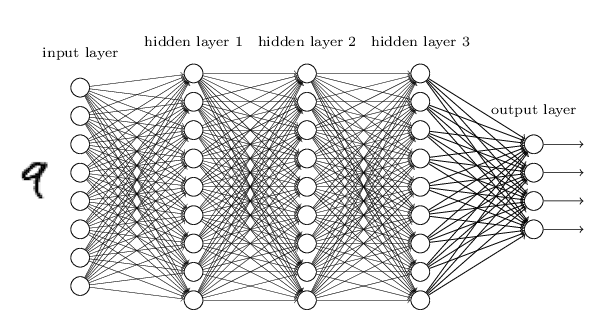

In [42]:
# The sequential API allows you to create models layer-by-layer.


model = Sequential()


In [43]:
#First Hidden Layer
model.add(Dense(512, input_shape=(784,)))
# Lapisan tersembunyi pertama memiliki 512 node (neuron) yang inputnya berupa vektor dengan ukuran 784. Setiap node akan menerima sebuah elemen dari setiap vektor input dan menerapkan beberapa bobot dan bias padanya.

model.add(Activation('relu'))
# Dalam jaringan saraf tiruan, fungsi aktivasi sebuah simpul mendefinisikan output dari simpul tersebut yang diberi input atau serangkaian input. ReLU adalah singkatan dari unit linier yang diperbaiki, dan merupakan jenis fungsi aktivasi.

model.add(Dropout(0.2))
# Dropout secara acak memilih beberapa node dan meniadakan keluarannya (menonaktifkan node). Hal ini membantu dalam memastikan bahwa model tidak terlalu cocok dengan dataset pelatihan.

# Penjelasan:

#     Menambahkan Dropout:
#         Kode ini menambahkan lapisan Dropout ke model neural network yang sedang dibangun.
#         Dropout(0.2) berarti bahwa selama pelatihan, 20% dari neuron dalam lapisan ini akan dinonaktifkan secara acak pada setiap iterasi (batch) pelatihan.

#     Apa Itu Dropout?:
#         Dropout adalah teknik regulasi yang digunakan dalam jaringan saraf untuk mencegah overfitting.
#         Overfitting terjadi ketika model belajar terlalu banyak detail dan noise dari data pelatihan, sehingga berkinerja buruk pada data yang tidak terlihat (data uji).

#     Bagaimana Dropout Bekerja:
#         Pada setiap iterasi selama pelatihan, Dropout secara acak memilih dan "menonaktifkan" (nullifies) sejumlah neuron, sehingga output mereka tidak dipertimbangkan dalam perhitungan lebih lanjut.
#         Neuron yang dinonaktifkan tidak berkontribusi pada output model dan tidak diperbarui selama proses backpropagation.
#         Misalnya, jika Anda memiliki 100 neuron dan menggunakan Dropout dengan tingkat 0.2, maka sekitar 20 neuron akan dinonaktifkan secara acak pada setiap batch.

#     Manfaat Dropout:
#         Mengurangi Overfitting: Dengan menonaktifkan beberapa neuron, Dropout mencegah model untuk menjadi terlalu bergantung pada neuron tertentu. Ini memaksa model untuk belajar representasi yang lebih robust dari data.
#         Meningkatkan Generalisasi: Dengan tidak bergantung pada neuron tertentu, model dapat bekerja lebih baik pada data yang tidak terlihat, meningkatkan kemampuan generalisasi.
#         Membangun Ensemble Models: Dropout dapat dianggap sebagai cara untuk membuat ensemble dari berbagai model. Setiap kali neuron yang berbeda dinonaktifkan, model yang berbeda dilatih, dan saat melakukan prediksi, semua neuron digunakan (dengan penyesuaian skala untuk mempertimbangkan dropout).

#     Penerapan Dropout:
#         Dropout biasanya diterapkan setelah lapisan dense atau convolutional, dan biasanya tidak digunakan di lapisan output.
#         Selama fase pengujian atau inferensi, semua neuron aktif digunakan, dan output mereka disesuaikan dengan proporsi dropout yang digunakan selama pelatihan.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
#Second hidden layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [45]:
#Final Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Fungsi Aktivasi Softmax:

#     Definisi:
#         Softmax adalah fungsi aktivasi yang digunakan untuk mengubah vektor input menjadi distribusi probabilitas.
#         Fungsi ini sering digunakan pada lapisan output dalam model klasifikasi multi-kelas, di mana model harus memilih satu dari beberapa kelas yang mungkin.

#     Karakteristik:
#         Nilai output dari fungsi Softmax bersifat non-negatif, yang berarti tidak ada nilai negatif.
#         Jumlah total dari semua output Softmax selalu sama dengan 1, sehingga dapat diinterpretasikan sebagai probabilitas.
#         Ini memungkinkan kita untuk memahami seberapa besar kemungkinan masing-masing kelas benar berdasarkan output model.

# Contoh Output:

#     Dalam contoh yang diberikan:
#     [0,0.94,0,0,0,0,0,0.06,0,0]
#     Interpretasi:
#     Output ini menunjukkan bahwa kelas kedua (indeks 1) memiliki probabilitas 0.94, dan kelas kedelapan (indeks 7) memiliki probabilitas 0.06.
#     Karena total probabilitas adalah 1 (0.94 + 0.06 = 1), ini menunjukkan bahwa model sangat yakin bahwa input (dalam hal ini, gambar) lebih mungkin merupakan angka 1.

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

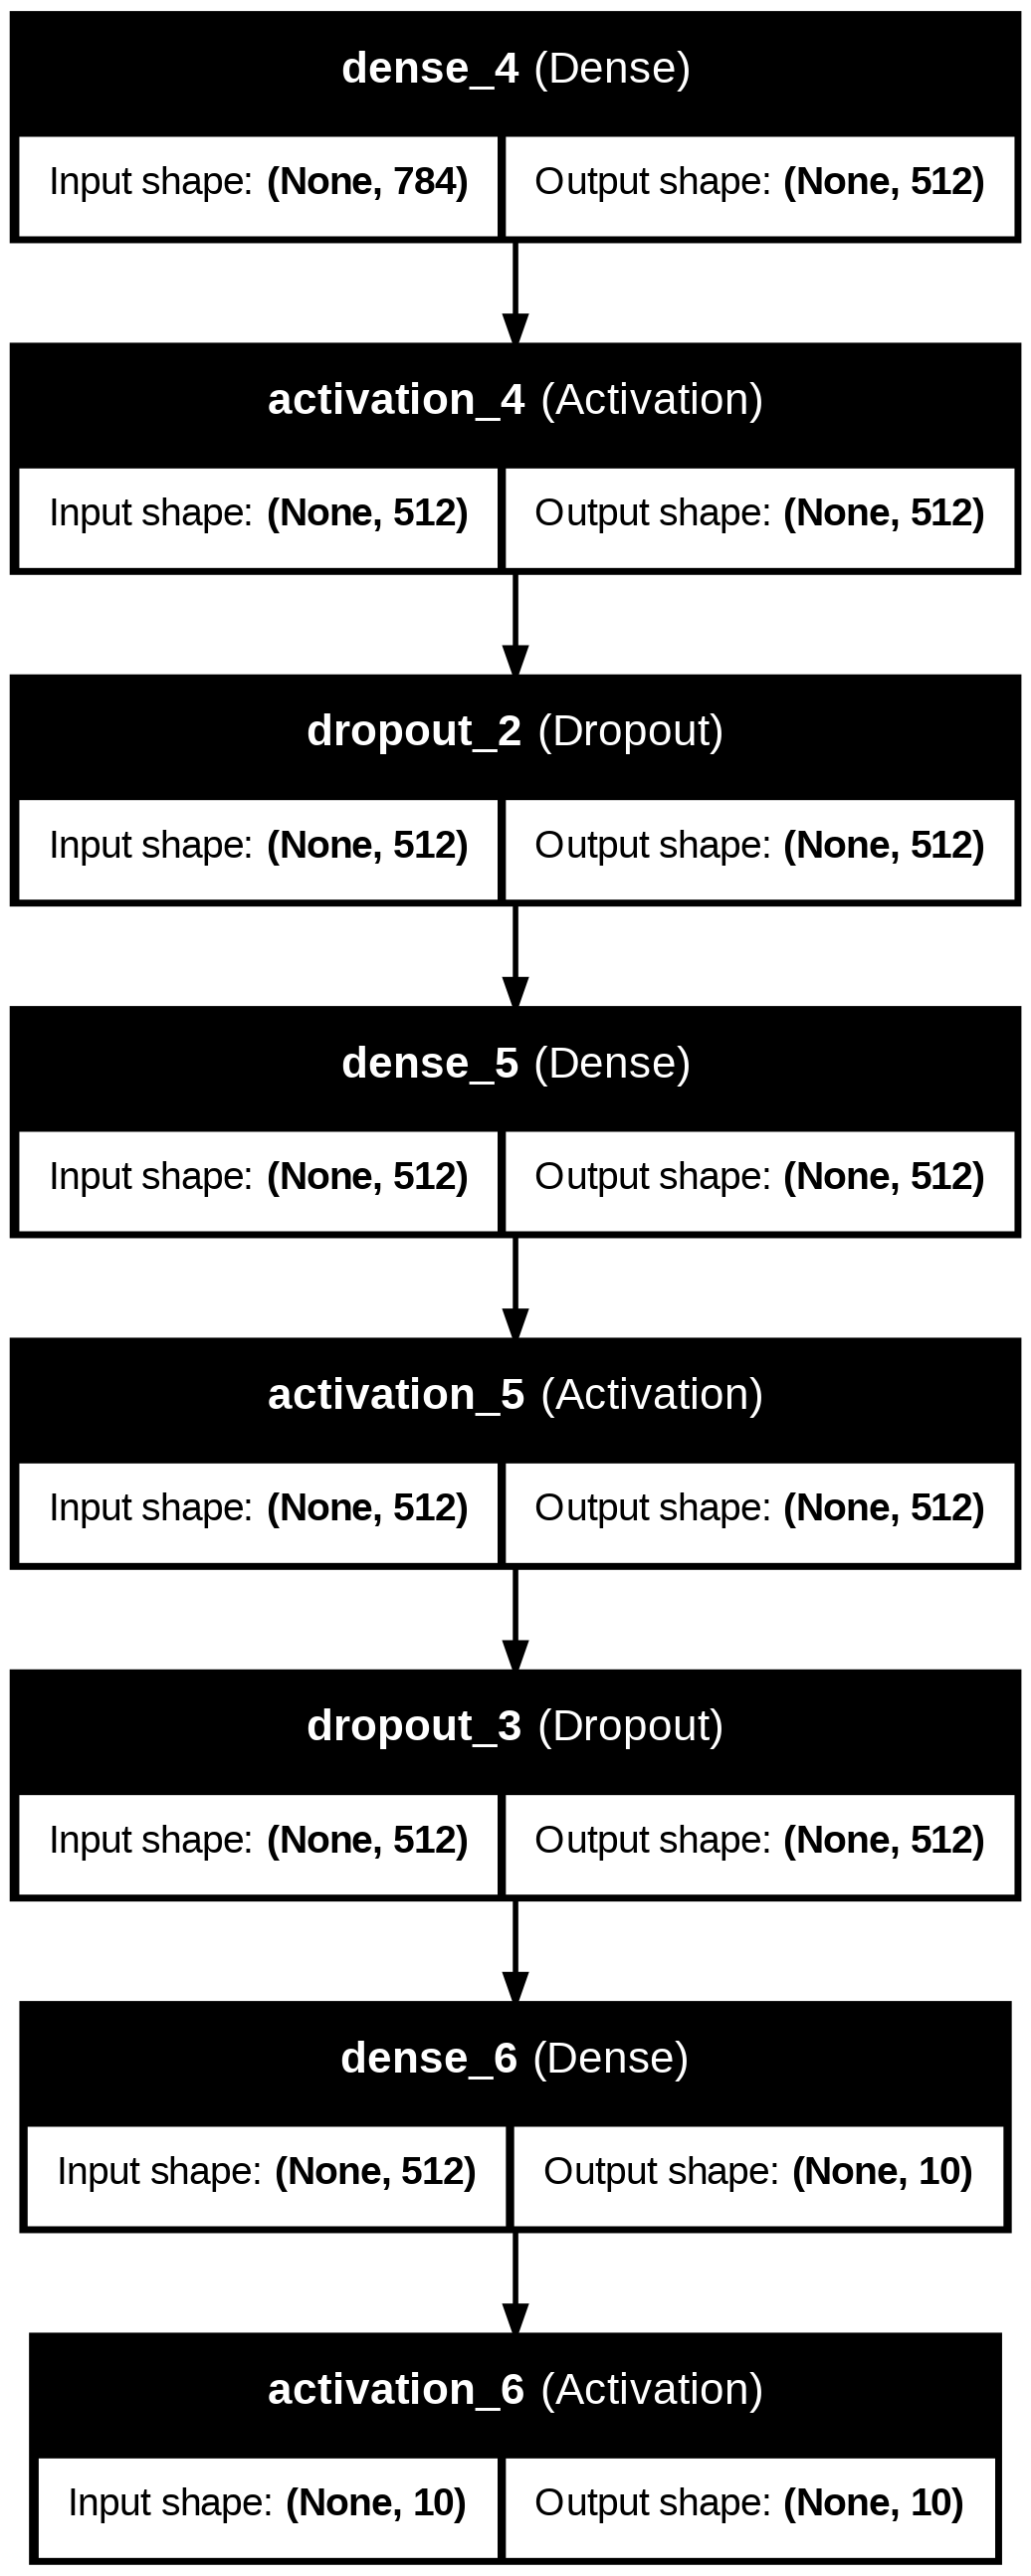

In [47]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [48]:
#compiling the model
# When compiling a model, Keras asks you to specify your loss function and your optimizer.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Categorical cross-entropy adalah fungsi loss yang digunakan dalam model klasifikasi multi-kelas untuk mengukur seberapa baik distribusi probabilitas yang diprediksi oleh model dibandingkan dengan distribusi probabilitas target (ground truth).
# Ini sangat umum digunakan dalam jaringan saraf untuk tugas klasifikasi, terutama ketika output adalah distribusi probabilitas, seperti yang dihasilkan oleh fungsi aktivasi Softmax.

# Interpretasi:

#     Categorical cross-entropy mengukur "jarak" antara distribusi probabilitas target dan distribusi yang diprediksi.
#     Jika model memprediksi dengan sangat baik (probabilitas tinggi untuk kelas yang benar dan rendah untuk kelas yang salah), maka nilai loss akan rendah.
#     Sebaliknya, jika model memprediksi dengan buruk, misalnya memberikan probabilitas tinggi untuk kelas yang salah, nilai loss akan tinggi.

# Kelebihan:

#     Categorical cross-entropy memberikan feedback yang baik selama pelatihan, karena penalti terhadap kesalahan besar lebih berat dibandingkan dengan kesalahan kecil.
#     Ini membuat model berusaha untuk memperbaiki prediksi yang salah, terutama untuk kelas-kelas yang sulit atau tidak seimbang.

# Penggunaan:

#     Categorical cross-entropy sangat cocok untuk situasi di mana Anda memiliki lebih dari dua kelas (multi-class classification) dan digunakan bersamaan dengan fungsi aktivasi Softmax di lapisan output.
#     Misalnya, dalam klasifikasi gambar digit (seperti MNIST), di mana ada 10 kelas (0 hingga 9), categorical cross-entropy akan digunakan untuk mengukur seberapa baik model memprediksi angka tersebut.


# Adam Optimizer:
# Optimizers

#     Definisi:
#         Optimizers adalah algoritma atau metode yang digunakan untuk memperbarui atribut dari jaringan saraf, seperti bobot (weights) dan laju pembelajaran (learning rate), dengan tujuan untuk mengurangi nilai loss function.
#         Proses ini penting dalam pelatihan model karena membantu menemukan kombinasi bobot yang optimal yang menghasilkan prediksi terbaik.

#     Peran dalam Pembelajaran:
#         Optimizers bertanggung jawab untuk mengarahkan proses pembelajaran dengan menyesuaikan bobot model berdasarkan gradien dari fungsi loss.
#         Mereka membantu model belajar dari data pelatihan dengan meminimalkan kesalahan antara prediksi model dan nilai target.

#     Minimasi Loss Function:
#         Loss function mengukur seberapa baik model melakukan prediksi. Optimizers berfungsi untuk meminimalkan fungsi loss tersebut dengan mengubah bobot model secara iteratif selama proses pelatihan.
#         Setiap iterasi, optimizer menggunakan informasi dari gradien untuk memutuskan langkah apa yang harus diambil dalam ruang parameter untuk mengurangi loss.

# Adam Optimizer

#     Apa itu Adam?:
#         Adam (Adaptive Moment Estimation) adalah salah satu optimizer yang paling populer dalam pembelajaran mendalam.
#         Kombinasi dari dua teknik, yaitu momentum dan RMSProp, yang membuatnya sangat efisien untuk berbagai jenis data dan model.

#     Keunggulan Adam:
#         Adaptif: Adam secara otomatis menyesuaikan laju pembelajaran untuk setiap parameter berdasarkan rata-rata gradien dan rata-rata kuadrat dari gradien. Ini membantu dalam mengatasi perbedaan skala di antara parameter.
#         Stabilitas: Dengan menggunakan momentum, Adam mempercepat konvergensi dan mengurangi fluktuasi yang sering terjadi saat menggunakan laju pembelajaran tetap.
#         Efisiensi: Adam bekerja dengan baik pada dataset besar dan juga efektif dalam menangani data yang sangat berisik.
#     Penggunaan:

#         Adam sering digunakan dalam berbagai aplikasi pembelajaran mendalam, termasuk pengenalan gambar, pemrosesan bahasa alami, dan banyak lagi.
#         Kelebihan adaptif dan kemampuannya untuk mengelola dataset besar menjadikannya pilihan yang sangat baik untuk banyak tugas pembelajaran mesin.

In [49]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

# Ukuran batch menentukan berapa banyak data per langkah yang digunakan untuk menghitung fungsi loss, gradien, dan backpropagation.
# Perhatikan bahwa akurasi meningkat setelah setiap epoch.
# Kita perlu memiliki jumlah epoch yang seimbang karena epoch yang lebih tinggi memiliki risiko overfitting model ke set pelatihan dan dapat menghasilkan akurasi yang lebih rendah dalam kasus pengujian.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8668 - loss: 0.4436
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9681 - loss: 0.1016
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9787 - loss: 0.0674
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9841 - loss: 0.0512
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9853 - loss: 0.0435
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9883 - loss: 0.0367
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9887 - loss: 0.0341
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9915 - loss: 0.0253
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9911 - loss: 0.0249
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9913 - loss: 0.0243


In [50]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0788
Test accuracy: 0.9815999865531921


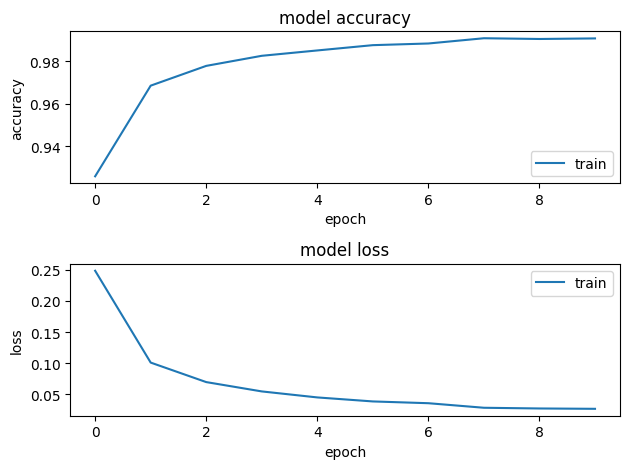

In [51]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [52]:
results = model.predict(test_data)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [53]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [54]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [60]:
# Sekarang, mari kita introspeksi beberapa gambar yang diklasifikasikan dengan benar dan salah untuk mendapatkan pemahaman yang lebih baik mengenai kegagalan model dan mudah-mudahan dapat mengambil tindakan perbaikan untuk meningkatkan akurasinya.
# predicted_classes = model.predict(X_test)
# Mendapatkan probabilitas dari model
predicted_probabilities = model.predict(X_test)

# Menentukan kelas dengan probabilitas tertinggi
predicted_classes = np.argmax(predicted_probabilities, axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


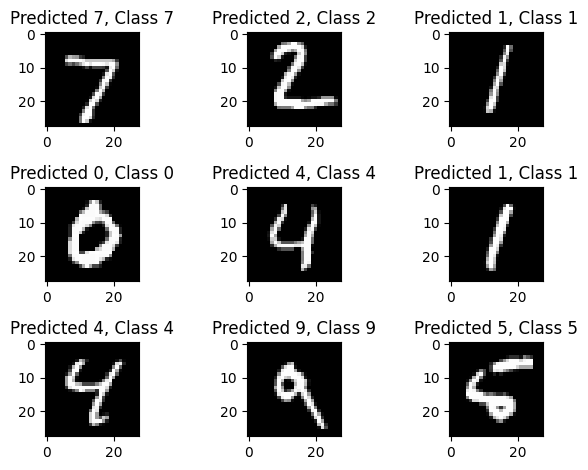

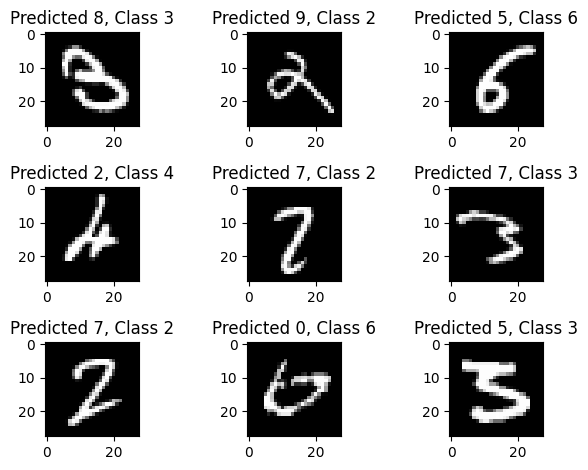

In [62]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()